#### Named Entity Recognition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas
book=pd.read_csv("iphone.txt",error_bad_lines=False)
book.head()

b'Skipping line 7: expected 1 fields, saw 2\nSkipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 4\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 29: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 40: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 3\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 4\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 51: expected 1 fields, saw 2\nSkipping line 52: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 4\nSkipping line 55: expected 1 fields, saw 4\nSkipping line 56: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\nSkipping line 59: expected 1 fields, saw 2\nSkipping line 61: expected 1 fiel

,x
0,I LOVE LOVE LOVE this phone! I always loved th...
1,Why is it Locked for cricket carrier?
2,forced to buy cricket carrier with phone??
3,"""This is a Cricket Locked iPhone - It Says So..."
4,I way Forced to Return this supposedly locked ...


In [3]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['I LOVE LOVE LOVE this phone! I always loved the old body style of the iPhone 4 and the size of the newer ones and now I get the best of both worlds, old Body style with a larger screen! I love the way it feels in my hand and I love how crystal clear everything looks. By far my favorite version of the iPhone. Well done Apple!',
 'Why is it Locked for cricket carrier?',
 'forced to buy cricket carrier with phone??',
 '"This is a Cricket Locked iPhone - It Says So in the Title!"',
 'I way Forced to Return this supposedly locked to cricket device,This brand New iPhone 12 Pro Mac 512GB SUPPOSEDLY LOCKED TO CRICKET WIRELESS I WAS FORCED TO HAVE TO RETURN THIS DEVICE BACK TO AMAZON 1. THIS DEVICE WOUKD NOT ACTIVATE UNDER THE CRICKET WIRELESS SUBSCRIPTION THAT AMAZON.com HAS SOLD TO ME 2. CRICKEY WIRELESS REFUSED TO PUT CRICKET WIRELESS HAND PROTECTION ON THIS DEVICE DUE TO THEM TELLING ME THAT THIS DEVICE WAS A BYOD DEVICE IN WHICH MEANS THAT THIS DEVICE THAT I WAS FORCED TO RETURN BACK TO 

In [4]:
##Part Of Speech Tagging
nlp = spacy.load('en')

one_block = book[4]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [5]:
one_block

'I way Forced to Return this supposedly locked to cricket device,This brand New iPhone 12 Pro Mac 512GB SUPPOSEDLY LOCKED TO CRICKET WIRELESS I WAS FORCED TO HAVE TO RETURN THIS DEVICE BACK TO AMAZON 1. THIS DEVICE WOUKD NOT ACTIVATE UNDER THE CRICKET WIRELESS SUBSCRIPTION THAT AMAZON.com HAS SOLD TO ME 2. CRICKEY WIRELESS REFUSED TO PUT CRICKET WIRELESS HAND PROTECTION ON THIS DEVICE DUE TO THEM TELLING ME THAT THIS DEVICE WAS A BYOD DEVICE IN WHICH MEANS THAT THIS DEVICE THAT I WAS FORCED TO RETURN BACK TO AMAZON SHOULD HAVE BEEN UNLOCKED BUT IT WAS NOT UNLOCKED. IT WAS LOCKED TO A MYSTERIOUS CARRIER. THEN I CALLED APPLE INC ABOUT THIS DEVICE AND WITH THEIR WONDERFUL PRIVACY AGREEMENT THAT THEY SO SUBCONSCIOUSLY HAVE WITH ME BUT THEY TOLD ME THAT TODAY DEVICE BELONGED TO SOME INDIVIDUALS NAME AND IT WAS NOT OENED BY AMAZON.com. SO BUYER BEWARE THIS IS IF YOU ARE EVEN TO BE ABLE TO SEE THESE LOCKED DEVICES BY CRICKET WIRELESS'

In [6]:
for token in doc_block[0:20]:
    print(token, token.pos_)

I PRON
way ADV
Forced VERB
to PART
Return VERB
this DET
supposedly ADV
locked VERB
to PART
cricket NOUN
device NOUN
, PUNCT
This DET
brand NOUN
New PROPN
iPhone PROPN
12 NUM
Pro PROPN
Mac PROPN
512 NUM


In [7]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['brand', 'SUPPOSEDLY', 'CRICKET', 'WAS', 'HAVE', 'RETURN', 'DEVICE', 'DEVICE', 'WOUKD', 'SUBSCRIPTION', 'HAS', 'SOLD', 'REFUSED', 'PUT', 'PROTECTION', 'DEVICE', 'TELLING', 'DEVICE', 'WAS', 'BYOD']


In [8]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,device,9
1,was,6
2,return,3
3,have,3
4,locked,2
5,cricket,2
6,forced,1
7,brand,1
8,supposedly,1
9,woukd,1


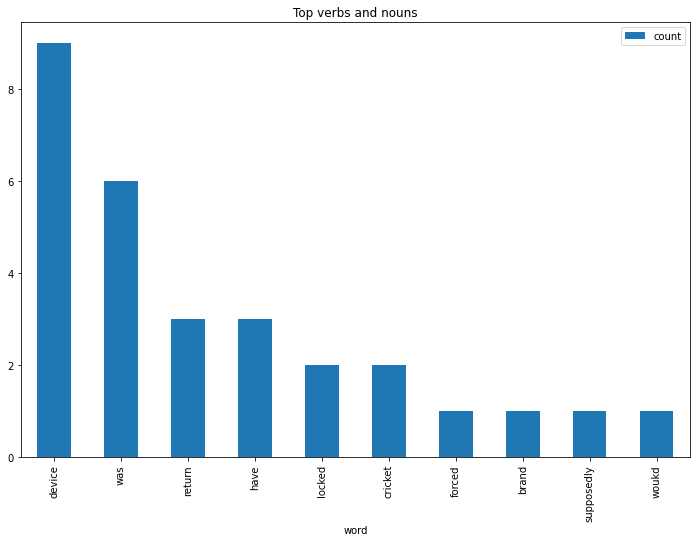

In [9]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [10]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [11]:
 afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("iphone.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book

b'Skipping line 7: expected 1 fields, saw 2\nSkipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 4\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 29: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 40: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 3\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 4\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 51: expected 1 fields, saw 2\nSkipping line 52: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 4\nSkipping line 55: expected 1 fields, saw 4\nSkipping line 56: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\nSkipping line 59: expected 1 fields, saw 2\nSkipping line 61: expected 1 fiel

['I LOVE LOVE LOVE this phone! I always loved the old body style of the iPhone 4 and the size of the newer ones and now I get the best of both worlds, old Body style with a larger screen! I love the way it feels in my hand and I love how crystal clear everything looks. By far my favorite version of the iPhone. Well done Apple!',
 'Why is it Locked for cricket carrier?',
 'forced to buy cricket carrier with phone??',
 '"This is a Cricket Locked iPhone - It Says So in the Title!"',
 'I way Forced to Return this supposedly locked to cricket device,This brand New iPhone 12 Pro Mac 512GB SUPPOSEDLY LOCKED TO CRICKET WIRELESS I WAS FORCED TO HAVE TO RETURN THIS DEVICE BACK TO AMAZON 1. THIS DEVICE WOUKD NOT ACTIVATE UNDER THE CRICKET WIRELESS SUBSCRIPTION THAT AMAZON.com HAS SOLD TO ME 2. CRICKEY WIRELESS REFUSED TO PUT CRICKET WIRELESS HAND PROTECTION ON THIS DEVICE DUE TO THEM TELLING ME THAT THIS DEVICE WAS A BYOD DEVICE IN WHICH MEANS THAT THIS DEVICE THAT I WAS FORCED TO RETURN BACK TO 

In [14]:
text = ' '.join(book)
text

'I LOVE LOVE LOVE this phone! I always loved the old body style of the iPhone 4 and the size of the newer ones and now I get the best of both worlds, old Body style with a larger screen! I love the way it feels in my hand and I love how crystal clear everything looks. By far my favorite version of the iPhone. Well done Apple! Why is it Locked for cricket carrier? forced to buy cricket carrier with phone?? "This is a Cricket Locked iPhone - It Says So in the Title!" I way Forced to Return this supposedly locked to cricket device,This brand New iPhone 12 Pro Mac 512GB SUPPOSEDLY LOCKED TO CRICKET WIRELESS I WAS FORCED TO HAVE TO RETURN THIS DEVICE BACK TO AMAZON 1. THIS DEVICE WOUKD NOT ACTIVATE UNDER THE CRICKET WIRELESS SUBSCRIPTION THAT AMAZON.com HAS SOLD TO ME 2. CRICKEY WIRELESS REFUSED TO PUT CRICKET WIRELESS HAND PROTECTION ON THIS DEVICE DUE TO THEM TELLING ME THAT THIS DEVICE WAS A BYOD DEVICE IN WHICH MEANS THAT THIS DEVICE THAT I WAS FORCED TO RETURN BACK TO AMAZON SHOULD HAV

In [16]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(book))
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I LOVE LOVE LOVE this phone!',
 'I always loved the old body style of the iPhone 4 and the size of the newer ones and now I get the best of both worlds, old Body style with a larger screen!',
 'I love the way it feels in my hand and I love how crystal clear everything looks.',
 'By far my favorite version of the iPhone.',
 'Well done Apple!',
 'Why is it Locked for cricket carrier?',
 'forced to buy cricket carrier with phone??',
 '"This is a Cricket Locked iPhone - It Says So in the Title!"',
 'I way Forced to Return this supposedly locked to cricket device,This brand New iPhone 12 Pro Mac 512GB SUPPOSEDLY LOCKED TO CRICKET WIRELESS I WAS FORCED TO HAVE TO RETURN THIS DEVICE BACK TO AMAZON 1.',
 'THIS DEVICE WOUKD NOT ACTIVATE UNDER THE CRICKET WIRELESS SUBSCRIPTION THAT AMAZON.com HAS SOLD TO ME 2.',
 'CRICKEY WIRELESS REFUSED TO PUT CRICKET WIRELESS HAND PROTECTION ON THIS DEVICE DUE TO THEM TELLING ME THAT THIS DEVICE WAS A BYOD DEVICE IN WHICH MEANS THAT THIS DEVICE THAT I WAS F

In [17]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,I LOVE LOVE LOVE this phone!
1,I always loved the old body style of the iPhon...
2,I love the way it feels in my hand and I love ...
3,By far my favorite version of the iPhone.
4,Well done Apple!
...,...
103,Cricket!This is so ridiculous no one use cricket!
104,This need to be unlocked Adha Nice product tha...
105,"Why?Why would someone pay full price $1,054.00..."
106,"How long will it be locked, forever?"


In [18]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [19]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [21]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     6
1    34
2    17
3     8
4     3
5     7
6     7
7    13
8    36
9    17
Name: word_count, dtype: int64

In [24]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
79,"Bottom Line:__________\r\n\r\nTo be clear, the...",4,17
85,Overall: A beautiful phone with a camera syste...,5,14
1,I always loved the old body style of the iPhon...,6,34
16,"awesomeness ,came fast and is the best apple s...",6,14
54,"Extremely happy with this phone , just the best .",6,10
49,Great deal Love this phone.,6,5
80,"It’s the fast, beautiful OLED screen, and it b...",6,27
26,Well I found it at Best Buy and you can get Ap...,6,17
0,I LOVE LOVE LOVE this phone!,6,6
2,I love the way it feels in my hand and I love ...,7,17


In [25]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    108.000000
mean       0.462963
std        2.496450
min       -7.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        7.000000
Name: sentiment_value, dtype: float64

In [26]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
4,Well done Apple!,0,3
5,Why is it Locked for cricket carrier?,0,7
6,forced to buy cricket carrier with phone??,0,7
7,"""This is a Cricket Locked iPhone - It Says So ...",0,13
8,I way Forced to Return this supposedly locked ...,0,36


In [27]:
sent_df[sent_df['sentiment_value']>0].head()

,sentence,sentiment_value,word_count
0,I LOVE LOVE LOVE this phone!,6,6
1,I always loved the old body style of the iPhon...,6,34
2,I love the way it feels in my hand and I love ...,7,17
3,By far my favorite version of the iPhone.,2,8
16,"awesomeness ,came fast and is the best apple s...",6,14


In [28]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


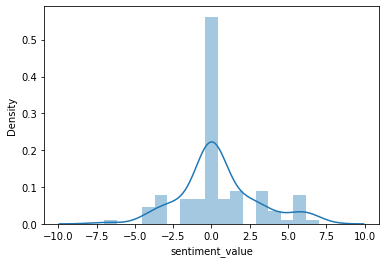

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

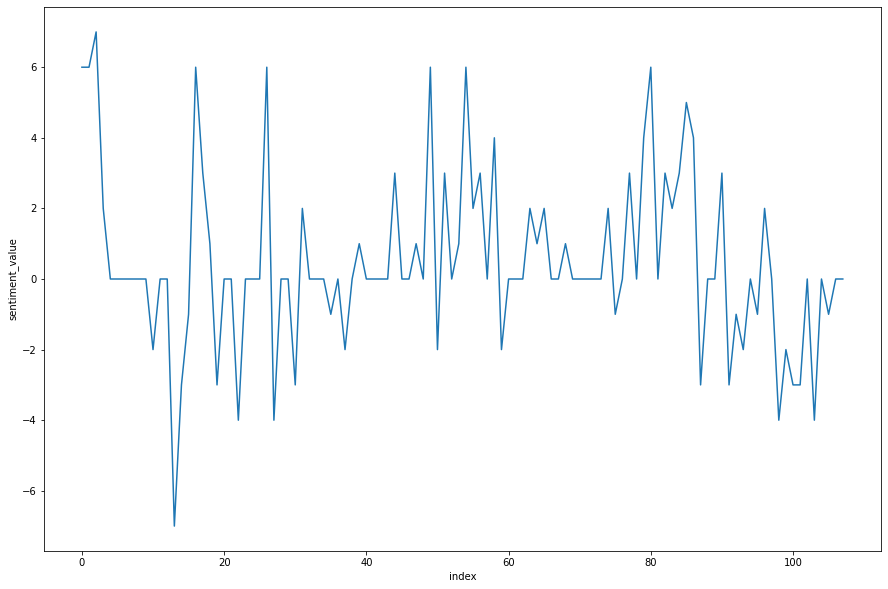

In [30]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

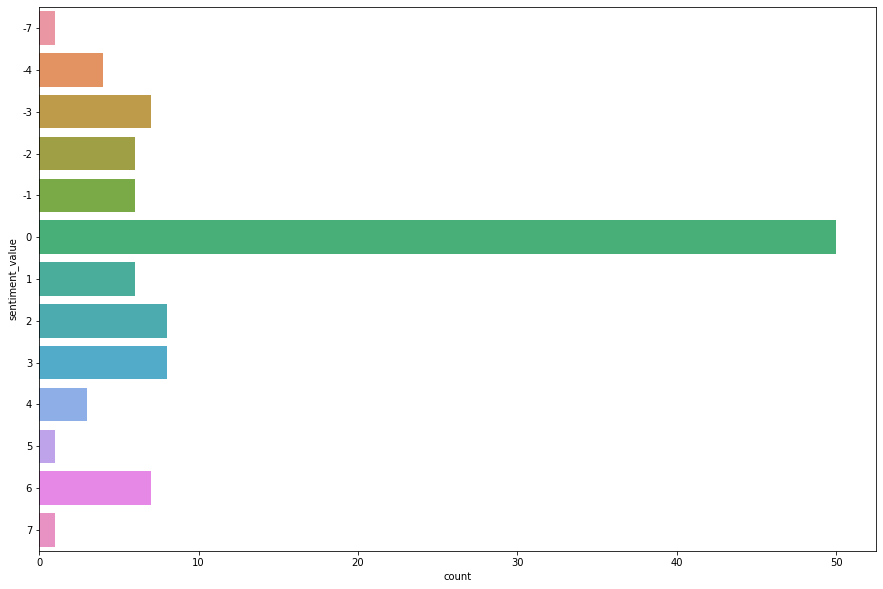

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(y='sentiment_value',data=sent_df)

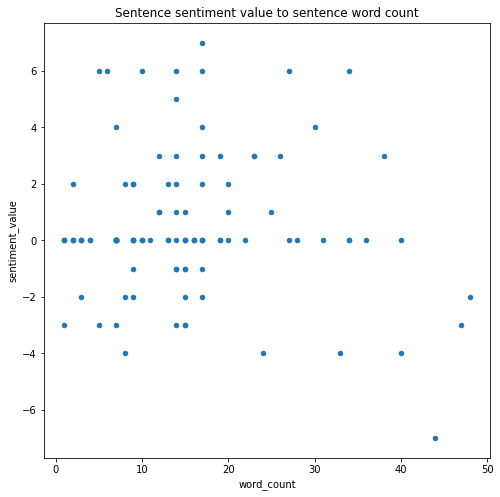

In [32]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [ ]:
#conclusion:
from the above analysis,we can conclude that this is neutral sentiment.